In [9]:
import pandas as pd
import re
import nltk
import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer  
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [ ]:
list = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('BarackObama since: 2023-01-01 untill: 2023 - 04- 20').get_items()):
     if i > 10000:
          break

list.append([tweet.date, tweet.id, tweet.url, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.lang , tweet.source, tweet.likeCount])
df = pd.DataFrame(list, columns = ['Datetime', 'Tweet Id','Tweet_url', 'Text', 'Username', 'Reply_count', 'Retweet_count','Tweet_lang','Source','Like_count'])

In [10]:
df = pd.read_csv("C:\\Users\\manideep\\Downloads\\train_E6oV3lV.csv")

In [11]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
df.tweet.value_counts

<bound method IndexOpsMixin.value_counts of 0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object>

In [13]:
emoticons = {}
a = [":‑)", ":)", ":-]", ":]", ":->", ":>", "8-)", "8)", ":-}", ":}", ":o)", ":c)", ":^)", "=]", "=)", ":‑D", ":D","8‑D",
"8D", "=D", "=3", "B^D", "c:", "C:", "x‑D", "xD", "X‑D", "XD", ":-))", ":'‑)", ":')", ':"D']
b = [":'‑(", ":'(", ":=(]", ":‑(", ":(", ":‑c", ":c", ":‑<", ":<", ":‑[", ":[", ":-||", ":{", ":@", ":(", ";(", "D‑':", "D:<", "D:", "D8", "D;", "D=", "DX"]
c = [">:(", ">:["]
for i in a:
    emoticons[i] = "Happy"
for i in b:
    emoticons[i] = "sad"
for i in c:
    emoticons[i] = "Angry"

In [14]:
def filter(text):
    for i in text:
        if  i in emoticons:
            i = emoticons[i, emot]
        else:
            i = i
        return(text)
df["tweet"] = df["tweet"].apply(lambda x : filter(x))

In [15]:
df["tweet"].values[:3]

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty'], dtype=object)

In [16]:
!pip install BeautifulSoup4
!pip install emoji
import emoji

from bs4 import BeautifulSoup 
def Refined_Text(text):
    text = re.sub("#\w*" , " ", text) # words containing hashtags
    text = re.sub("@\w*", " ", text) # mentions
    text = re.sub("\n", " ", text)   # newline
    text = re.sub("[\$\%\^\:\;\.\,\<\>\!\?\(\)\-\=]", " ", text) # special characters and other symbols
    text = re.sub("\s\s+", " ", text) # multiple white spaces
    text = re.sub("\w+\:\/\/\S+", " ", text)  # links
    text = re.sub("\w*\d\w*", " ", text)      # alpha numeric words
    text = BeautifulSoup(text).get_text()  # html tags
    text = emoji.demojize(text, delimiters = ("", ""))
    text = text.lower()   
    return text
df["tweet"] = df["tweet"].apply(lambda x : Refined_Text(x))

C:\Users\manideep\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [17]:
df["tweet"].values[:3]

array(['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction ',
       "thanks for credit i can't use cause they don't offer wheelchair vans in pdx ",
       'bihday your majesty'], dtype=object)

In [18]:
df["tweet"][31957]

'ate isz that youuu ð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dð\x9f\x98\x8dâ\x9d¤ï¸\x8f '

In [19]:
def token_words(text):
     tokenizer = TreebankWordTokenizer()
     lemmatizer = WordNetLemmatizer()
     text = tokenizer.tokenize(text)
     upd_words = [lemmatizer.lemmatize(i) for i in text]
     upd_words = [i for i in upd_words if i not in stopwords.words("english")]
     return(upd_words)
words = df["tweet"].apply(lambda x : token_words(x))

In [20]:
words[:10].values

array([list(['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction']),
       list(['thanks', 'credit', 'ca', "n't", 'use', 'cause', "n't", 'offer', 'wheelchair', 'van', 'pdx']),
       list(['bihday', 'majesty']),
       list(['love', 'u', 'take', 'u', 'time', 'urð\x9f\x93±', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦']),
       list(['factsguide', 'society']),
       list(['[', '/', ']', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'dispute', 'get']),
       list(['camping', 'tomorrow', 'dannyâ\x80¦']),
       list(['next', 'school', 'year', 'year', 'exam', 'ð\x9f\x98¯', 'ca', "n't", 'think', 'ð\x9f\x98\xad']),
       list(['love', 'land', 'â\x80¦']), list(['welcome', "'m", "'s"])],
      dtype=object)

In [21]:
def clean(tweet):
      for i in tweet:
                if i.isalpha() == True:
                     i = i
                else:
                     tweet.remove(i) 
      return(tweet)
    
df["tweet"] = words.apply(lambda x : clean(x))

In [22]:
df["tweet"][31957]

['ate', 'isz', 'youuu']

In [23]:
def combined_text(text):
         combined_text = " ".join(text)
         return(combined_text)
df["tweet"] = df["tweet"].apply(lambda x : combined_text(x))

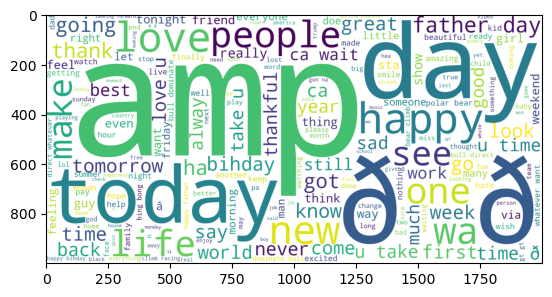

In [24]:
import matplotlib.pyplot as plt
mask = np.array(Image.open("C:\\Users\\manideep\\Downloads\\Twitter_image.png"))
#image = np.array(Image.open("C:\\Users\\manideep\\Downloads\\Twitter.jpg.htm"))
wordcloud = WordCloud(height = 1000, width = 2000, background_color = "white").generate(" ".join(df["tweet"]))
plt.imshow(wordcloud)


In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
df["polarity"] = df["tweet"].apply(lambda x : sia.polarity_scores(x)["compound"])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manideep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
def scores(x):
    if x >= 0.5:
        res = 2
    elif x <= -0.5:
        res = 0
    elif -0.5 < x < 0.5:
        res = 1
    return(res)
    
df["sentiment"] = df["polarity"].apply(lambda x : scores(x))

In [27]:
df["sentiment"][:3]

0    0
1    2
2    1
Name: sentiment, dtype: int64

In [28]:
df.head()

,id,label,tweet,polarity,sentiment
0,1,0,father dysfunctional selfish drag kid dysfunction,-0.7783,0
1,2,0,thanks credit ca use cause offer wheelchair va...,0.6705,2
2,3,0,bihday majesty,0.0000,1
3,4,0,love u take u time ðððð,0.6369,2
4,5,0,factsguide society,0.0000,1


<AxesSubplot:xlabel='sentiment', ylabel='id'>

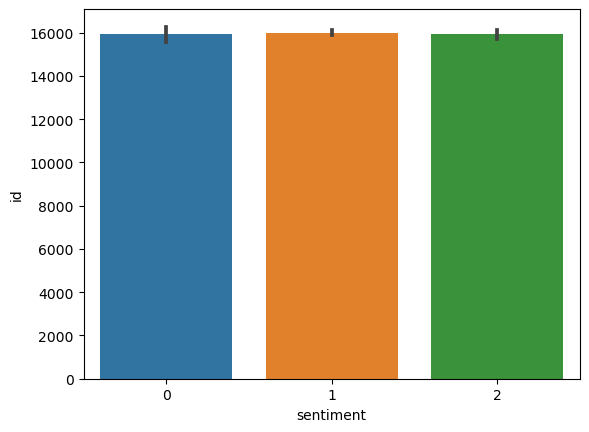

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data = df, x = "sentiment", y = "id")

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
x = count.fit_transform(df["tweet"])

In [31]:
y = df["sentiment"]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
train_preds = rf.predict(x_train)
test_preds = rf.predict(x_test)


In [34]:
from sklearn.metrics import accuracy_score
print("acc of train:", accuracy_score(train_preds, y_train))
print("acc of test:", accuracy_score(test_preds, y_test))

acc of train: 0.9999217802808088
acc of test: 0.905834506491475
